## Creating Mongo DB

In [96]:
import pymongo

In [35]:
client = pymongo.MongoClient('localhost', 27017)

In [36]:
db = client['chapter3']

In [37]:
collection = db['income']

In [38]:
with open('data/income_header.txt') as f_in:
    columns_headings = f_in.readline()

    

In [39]:
columns_headings

'age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label'

In [40]:
columns_headings_list = columns_headings.split(',')

In [41]:
columns_headings_list

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'label']

In [42]:
row_dict_list = list()
with open('data/income.txt') as f_in:
    for line in f_in:
        row_list = line.rstrip('\n').split(',')
        row_dict = dict(zip(columns_headings_list, row_list))
        row_dict_list.append(row_dict)
        collection.insert_one(row_dict)

In [43]:
collection.count() # should be = 32562

<ipython-input-43-ac4899ba2df1>:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  collection.count() # should be = 32562


65124

## Checking data quality

In [56]:
age39 = collection.find_one({'age':39})

In [57]:
age39

{'_id': ObjectId('5fcf6d9ef9de2fc3e84a926a'),
 'age': 39,
 'workclass': ' State-gov',
 'fnlwgt': ' 77516',
 'education': ' Bachelors',
 'education-num': ' 13',
 'marital-status': ' Never-married',
 'occupation': ' Adm-clerical',
 'relationship': ' Not-in-family',
 'race': ' White',
 'sex': ' Male',
 'capital-gain': ' 2174',
 'capital-loss': ' 0',
 'hours-per-week': ' 40',
 'native-country': ' United-States',
 'label': ' <=50K'}

In [46]:
row_dict_list[0]

{'age': '39',
 'workclass': ' State-gov',
 'fnlwgt': ' 77516',
 'education': ' Bachelors',
 'education-num': ' 13',
 'marital-status': ' Never-married',
 'occupation': ' Adm-clerical',
 'relationship': ' Not-in-family',
 'race': ' White',
 'sex': ' Male',
 'capital-gain': ' 2174',
 'capital-loss': ' 0',
 'hours-per-week': ' 40',
 'native-country': ' United-States',
 'label': ' <=50K',
 '_id': ObjectId('5fcf6ba6f9de2fc3e84a1338')}

In [47]:
collection.find_one({})


{'_id': ObjectId('5fce2820f9de2fc3e8499405'),
 'age': '39',
 'workclass': ' State-gov',
 'fnlwgt': ' 77516',
 'education': ' Bachelors',
 'education-num': ' 13',
 'marital-status': ' Never-married',
 'occupation': ' Adm-clerical',
 'relationship': ' Not-in-family',
 'race': ' White',
 'sex': ' Male',
 'capital-gain': ' 2174',
 'capital-loss': ' 0',
 'hours-per-week': ' 40',
 'native-country': ' United-States',
 'label': ' <=50K'}

In [60]:
collection.delete_many({})

In [61]:
collection.count()

<ipython-input-61-7c4bc5758cb0>:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  collection.count()


0

In [62]:
with open('data/income.txt') as f_in:
    for line in f_in:
        row_list = line.rstrip('\n').split(',')
        row_dict = dict(zip(columns_headings_list, row_list))
        
        try:
            row_dict['age'] = int(row_dict['age']) # making sure that age is int
            #row_dict_list.append(row_dict)
            collection.insert_one(row_dict)
        except:
            pass
        

In [63]:
collection.count()

<ipython-input-63-7c4bc5758cb0>:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  collection.count()


32561

In [70]:
over_35 = collection.find({'age': {"$gt":35}})
type(over_35)

pymongo.cursor.Cursor

In [71]:
over_35.next()

{'_id': ObjectId('5fcf6e82f9de2fc3e84b90cc'),
 'age': 39,
 'workclass': ' State-gov',
 'fnlwgt': ' 77516',
 'education': ' Bachelors',
 'education-num': ' 13',
 'marital-status': ' Never-married',
 'occupation': ' Adm-clerical',
 'relationship': ' Not-in-family',
 'race': ' White',
 'sex': ' Male',
 'capital-gain': ' 2174',
 'capital-loss': ' 0',
 'hours-per-week': ' 40',
 'native-country': ' United-States',
 'label': ' <=50K'}

In [72]:
over_35.next()

{'_id': ObjectId('5fcf6e82f9de2fc3e84b90cd'),
 'age': 50,
 'workclass': ' Self-emp-not-inc',
 'fnlwgt': ' 83311',
 'education': ' Bachelors',
 'education-num': ' 13',
 'marital-status': ' Married-civ-spouse',
 'occupation': ' Exec-managerial',
 'relationship': ' Husband',
 'race': ' White',
 'sex': ' Male',
 'capital-gain': ' 0',
 'capital-loss': ' 0',
 'hours-per-week': ' 13',
 'native-country': ' United-States',
 'label': ' <=50K'}

In [73]:
over_35.count()

<ipython-input-73-6e46c659321d>:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  over_35.count()


17636

## Timing of effective querying with `time`

In [74]:
import time

In [77]:
start = time.time()
age50 = collection.find({'age': {'$eq':50}})
end = time.time()
print(end - start)

0.00010895729064941406


In [83]:
index_result = db.profiles.create_index(
    [('age', pymongo.ASCENDING)], unique=False)

In [86]:
start = time.time()
age45 = collection.find({'age': {'$eq':45}})
end = time.time()
print(end - start)

0.00011301040649414062


## Loading data into `DataFrame`

In [87]:
import pandas as pd

In [91]:
income_df = pd.DataFrame(list(collection.find()))

In [92]:
income_df.head()

,_id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,5fcf6e82f9de2fc3e84b90cc,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,5fcf6e82f9de2fc3e84b90cd,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,5fcf6e82f9de2fc3e84b90ce,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,5fcf6e82f9de2fc3e84b90cf,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5fcf6e82f9de2fc3e84b90d0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [93]:
income_df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [95]:
income_df['education'].describe()

count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object

#### Quick check of yahoo finance

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
stocks = ["AAPL", "GOOGL"]

In [8]:
data = yf.download(stocks, 
                   start="2020-01-01", 
                   end="2020-11-28")

[*********************100%***********************]  2 of 2 completed


In [10]:
data.head()

Adj Close                   Close                    High  \
                 AAPL        GOOGL       AAPL        GOOGL       AAPL   
Date                                                                    
2020-01-02  73.840042  1368.680054  75.087502  1368.680054  75.150002   
2020-01-03  73.122154  1361.520020  74.357498  1361.520020  75.144997   
2020-01-06  73.704819  1397.810059  74.949997  1397.810059  74.989998   
2020-01-07  73.358185  1395.109985  74.597504  1395.109985  75.224998   
2020-01-08  74.538239  1405.040039  75.797501  1405.040039  76.110001   

                               Low                    Open               \
                  GOOGL       AAPL        GOOGL       AAPL        GOOGL   
Date                                                                      
2020-01-02  1368.680054  73.797501  1346.489990  74.059998  1348.410034   
2020-01-03  1373.750000  74.125000  1347.319946  74.287498  1348.000000   
2020-01-06  1398.319946  73.187500  1351.000000  73.447502  1351.630005   
2020-01-07  1403.500000  74.370003  1391.560059  74.959999  1400.459961   
2020-01-08  1411.849976  74.290001  1392.630005  74.290001  1394.819946   

               Volume           
                 AAPL    GOOGL  
Date                            
2020-01-02  135480400  1363900  
2020-01-03  146322800  1170400  
2020-01-06  118387200  2338400  
2020-01-07  108872000  1716500  
2020-01-08  132079200  1765700

In [11]:
closedStocks = data.loc[:, "Close"].copy()

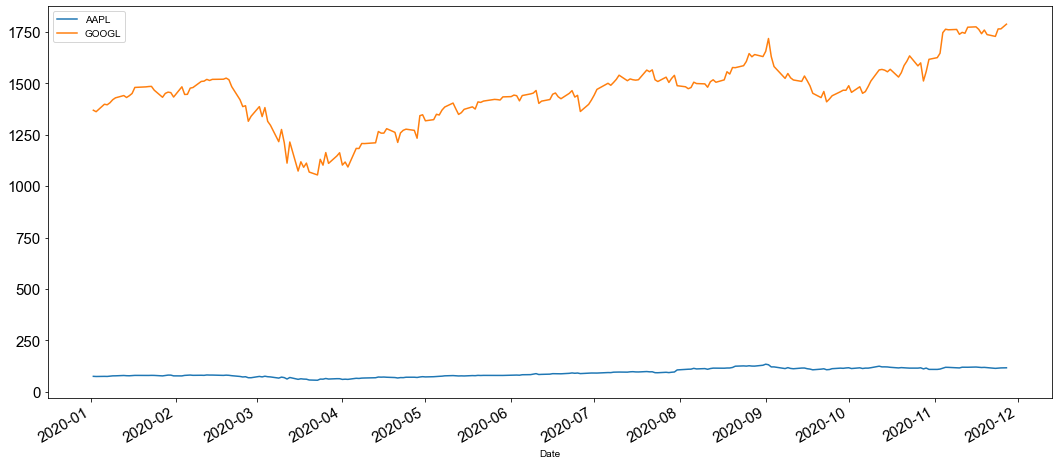

In [13]:
closedStocks.plot(figsize = (18, 8), fontsize = 15)
plt.style.use("seaborn")
plt.show();

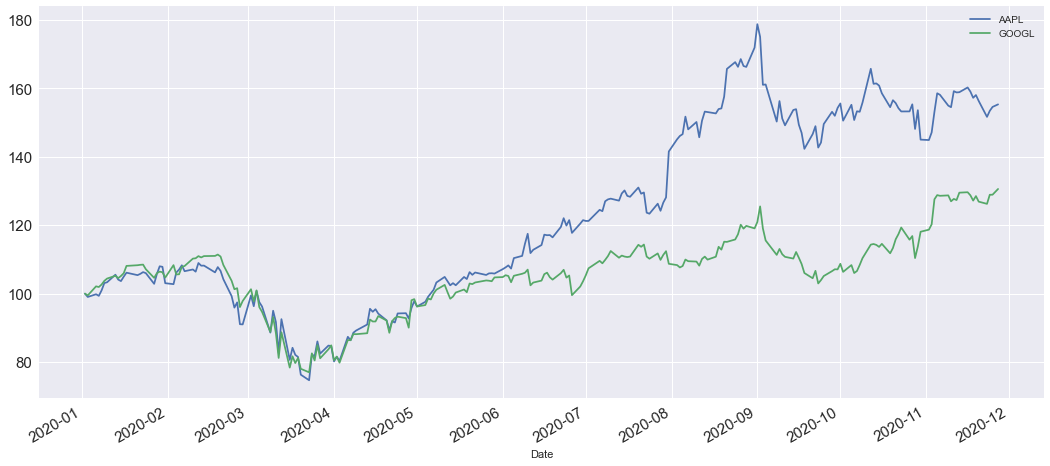

In [15]:
norm = closedStocks.div(closedStocks.iloc[0]).mul(100)
norm.plot(figsize = (18, 8), fontsize = 15)
plt.style.use("seaborn")
plt.show();